In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def find_baseline_moving_avg(file_list, window_size, theta=0.5):  
    if len(file_list) == 1:
        df=pd.read_csv(file_list[0], sep=',', skiprows = 0, header= 1)
        data = df['r']
        quantile1 = np.zeros(len(data)-window_size)
        quantile2 = np.zeros(len(data)-window_size)
        avg = np.zeros(len(data)-window_size)
        for i in range(len(data)-window_size):
            avg[i] = np.mean(data[i:i+window_size])
            quantile1[i] = np.quantile(data[i:i+window_size], 0.25)
            quantile2[i] = np.quantile(data[i:i+window_size], 0.75)
        return avg, quantile1, quantile2
    else:
        # find minimum length
        min_len = 1e7
        for i in range(len(file_list)):
            df = pd.read_csv(file_list[i], sep=',', skiprows = 0, header= 1)
            y_val = df['r']
            cur_len = len(y_val)
            if cur_len < min_len:
                min_len = cur_len
        data = np.zeros((len(file_list), min_len))
        for i in range(len(file_list)):
            df = pd.read_csv(file_list[i], sep=',', skiprows = 0, header= 1)
            data[i,:] = df['r'].values.ravel()[0:min_len]
        std = np.std(data,axis=0)
        avg = np.mean(data,axis=0)
        smoothed_avg = np.zeros(min_len-window_size)
        smoothed_std = np.zeros(min_len-window_size)
        # smooth 
        for i in range(min_len-window_size):
            smoothed_avg[i] = np.mean(avg[i:i+window_size])
            smoothed_std[i] = np.mean(std[i:i+window_size])
        return smoothed_avg, smoothed_avg-theta*smoothed_std, smoothed_avg+theta*smoothed_std
    
def find_drpo_moving_avg(file_list, window_size, theta = 0.5):  
        # find minimum length
        min_len = 1e7
        for i in range(len(file_list)):
            df = pd.read_csv(file_list[i], sep=',', header= None)
            y_val = df[1]
            cur_len = len(y_val)
            if cur_len < min_len:
                min_len = cur_len
        data = np.zeros((len(file_list), min_len))
        for i in range(len(file_list)):
            df = pd.read_csv(file_list[i], sep=',', header= None)
            data[i,:] = df[1].values.ravel()[0:min_len]
        std = np.std(data,axis=0)
        avg = np.mean(data,axis=0)
        smoothed_avg = np.zeros(min_len-window_size)
        smoothed_std = np.zeros(min_len-window_size)
        # smooth 
        for i in range(min_len-window_size):
            smoothed_avg[i] = np.mean(avg[i:i+window_size])
            smoothed_std[i] = np.mean(std[i:i+window_size])
        return smoothed_avg, smoothed_avg-theta*smoothed_std, smoothed_avg+theta*smoothed_std

# Full trajectory to approximate the advantage function (N = 500)

ODRPOWass
324.0806666666667
77.59639762208332
ODRPOKL
401.23799999999994
41.981520809114386


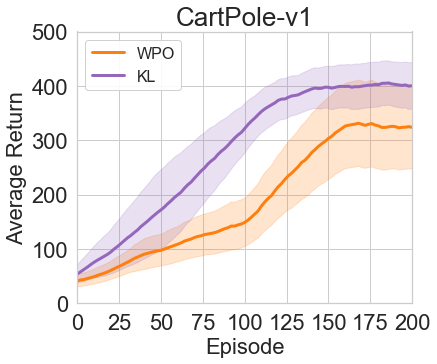

In [2]:
sns.set()
sns.set_style("whitegrid")
%matplotlib inline
plt.rcParams["figure.figsize"] = (6,5)

kl_file_list = ['./log_files/dr_trpo_kl/CartPole-v1-1581924483.4587069.csv', './log_files/dr_trpo_kl/CartPole-v1-1583890398.574406.csv',
               './log_files/dr_trpo_kl/CartPole-v1-1583952153.9513202.csv', './log_files/dr_trpo_kl/CartPole-v1-1583953051.3048809.csv',
               './log_files/dr_trpo_kl/CartPole-v1-1583952775.07668.csv']
wass_file_list = ['./log_files/dr_trpo_wass/CartPole-v1-1581924172.541198.csv', './log_files/dr_trpo_wass/CartPole-v1-1585971521.2477708.csv',
                 './log_files/dr_trpo_wass/CartPole-v1-1586164922.54085.csv', './log_files/dr_trpo_wass/CartPole-v1-1581924172.541198.csv',
                 './log_files/dr_trpo_wass/CartPole-v1-1582186716.514488.csv']
window_size = 30
        
ax = plt.subplot(111)
plt.ylabel('Average Return', fontsize=22)
plt.xlabel('Episode', fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlim(0,200)
plt.ylim(0,500)
plt.title('CartPole-v1', fontsize = 26)

# DRPO Wass
eps_per_iter = 2
moving_average = find_drpo_moving_avg(wass_file_list, window_size,0.5)
ax.plot(np.arange(len(moving_average[0]))*eps_per_iter, moving_average[0], label='WPO', linewidth = 3, color = "tab:orange")
ax.fill_between(np.arange(len(moving_average[0]))*eps_per_iter, moving_average[1], moving_average[2], alpha=0.2, color = "tab:orange")
print('ODRPOWass')
print(np.mean(moving_average[0][int(190/eps_per_iter):int(200/eps_per_iter)]))
print(np.mean(moving_average[2][int(190/eps_per_iter):int(200/eps_per_iter)]) - np.mean(moving_average[0][int(190/eps_per_iter):int(200/eps_per_iter)]))

# DRPO KL
eps_per_iter = 2
moving_average = find_drpo_moving_avg(kl_file_list, window_size,0.5)
ax.plot(np.arange(len(moving_average[0]))*eps_per_iter, moving_average[0], label='KL', linewidth = 3, color = "tab:purple")
ax.fill_between(np.arange(len(moving_average[0]))*eps_per_iter, moving_average[1], moving_average[2], alpha=0.2, color = "tab:purple")
print('ODRPOKL')
print(np.mean(moving_average[0][int(190/eps_per_iter):int(200/eps_per_iter)]))
print(np.mean(moving_average[2][int(190/eps_per_iter):int(200/eps_per_iter)]) - np.mean(moving_average[0][int(190/eps_per_iter):int(200/eps_per_iter)]))

plt.rcParams["legend.framealpha"] = 0.9
ax.legend(loc='upper left', fontsize = 16)

DRPOWass
-157.9488888888889
7.956480314488687
DRPOKL
-160.3859259259259
33.42649521918911


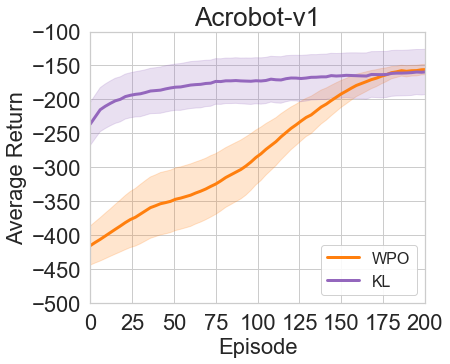

In [3]:
sns.set()
sns.set_style("whitegrid")
%matplotlib inline
plt.rcParams["figure.figsize"] = (6,5)

kl_file_list = ['./log_files/dr_trpo_kl/Acrobot-v1-1583751552.3857012.csv', './log_files/dr_trpo_kl/Acrobot-v1-1583970696.301418.csv',
               './log_files/dr_trpo_kl/Acrobot-v1-1586117014.473505.csv', './log_files/dr_trpo_kl/Acrobot-v1-1586131510.5272682.csv',
               './log_files/dr_trpo_kl/Acrobot-v1-1586140832.517568.csv']
wass_file_list = ['./log_files/dr_trpo_wass/Acrobot-v1-1583983141.8097558.csv', './log_files/dr_trpo_wass/Acrobot-v1-1586073086.365524.csv',
                 './log_files/dr_trpo_wass/Acrobot-v1-1586131507.532618.csv', './log_files/dr_trpo_wass/Acrobot-v1-1586140916.3434792.csv',
                 './log_files/dr_trpo_wass/Acrobot-v1-1586462541.3166761.csv']
window_size = 30
        
ax = plt.subplot(111)
plt.ylabel('Average Return', fontsize=22)
plt.xlabel('Episode', fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlim(0,200)
plt.ylim(-500,-100)
plt.title('Acrobot-v1', fontsize = 26)

# DRPO Wass
eps_per_iter = 3
moving_average = find_drpo_moving_avg(wass_file_list, window_size,0.3)
ax.plot(np.arange(len(moving_average[0]))*eps_per_iter, moving_average[0], label='WPO', linewidth = 3, color = "tab:orange")
ax.fill_between(np.arange(len(moving_average[0]))*eps_per_iter, moving_average[1], moving_average[2], alpha=0.2, color = "tab:orange")
print('DRPOWass')
print(np.mean(moving_average[0][int(190/eps_per_iter):int(200/eps_per_iter)]))
print(np.mean(moving_average[2][int(190/eps_per_iter):int(200/eps_per_iter)]) - np.mean(moving_average[0][int(190/eps_per_iter):int(200/eps_per_iter)]))

# DRPO KL
eps_per_iter = 3
moving_average = find_drpo_moving_avg(kl_file_list, window_size,0.3)
ax.plot(np.arange(len(moving_average[0]))*eps_per_iter, moving_average[0], label='KL', linewidth = 3, color = "tab:purple")
ax.fill_between(np.arange(len(moving_average[0]))*eps_per_iter, moving_average[1], moving_average[2], alpha=0.2, color = "tab:purple")
print('DRPOKL')
print(np.mean(moving_average[0][int(190/eps_per_iter):int(200/eps_per_iter)]))
print(np.mean(moving_average[2][int(190/eps_per_iter):int(200/eps_per_iter)]) - np.mean(moving_average[0][int(190/eps_per_iter):int(200/eps_per_iter)]))

plt.rcParams["legend.framealpha"] = 0.9
ax.legend(loc='lower right', fontsize = 16)

# Finite sample approximation of advantage function (N = 100)

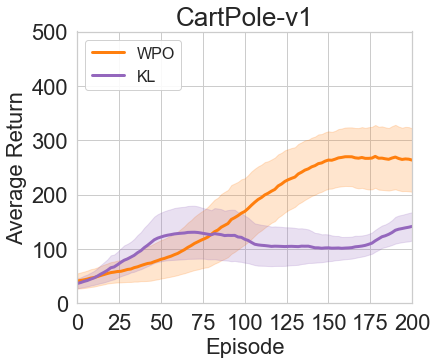

In [4]:
sns.set()
sns.set_style("whitegrid")
%matplotlib inline
plt.rcParams["figure.figsize"] = (6,5)



kl_file_list = ['./log_files/new/kl/CartPole-v1-1606740336.0468102.csv', './log_files/new/kl/CartPole-v1-1606741074.8512828.csv',
               './log_files/new/kl/CartPole-v1-1606741436.926656.csv', './log_files/new/kl/CartPole-v1-1606742242.5885959.csv']
wass_file_list = ['./log_files/new/wass/CartPole-v1-1606741688.032158.csv', './log_files/new/wass/CartPole-v1-1606741301.235729.csv',
                 './log_files/new/wass/CartPole-v1-1606741017.3541708.csv', './log_files/new/wass/CartPole-v1-1606742069.431458.csv']
window_size = 30
        
ax = plt.subplot(111)
plt.ylabel('Average Return', fontsize=22)
plt.xlabel('Episode', fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlim(0,200)
plt.ylim(0,500)
plt.title('CartPole-v1', fontsize = 26)

# DRPO Wass
eps_per_iter = 2
moving_average = find_drpo_moving_avg(wass_file_list, window_size,0.5)
ax.plot(np.arange(len(moving_average[0]))*eps_per_iter, moving_average[0], label='WPO', linewidth = 3,  color = "tab:orange")
ax.fill_between(np.arange(len(moving_average[0]))*eps_per_iter, moving_average[1], moving_average[2], alpha=0.2,  color = "tab:orange")

# DRPO KL
eps_per_iter = 2
moving_average = find_drpo_moving_avg(kl_file_list, window_size,0.5)
ax.plot(np.arange(len(moving_average[0]))*eps_per_iter, moving_average[0], label='KL', linewidth = 3,  color = "tab:purple")
ax.fill_between(np.arange(len(moving_average[0]))*eps_per_iter, moving_average[1], moving_average[2], alpha=0.2,  color = "tab:purple")


plt.rcParams["legend.framealpha"] = 0.9
ax.legend(loc='upper left', fontsize = 16)

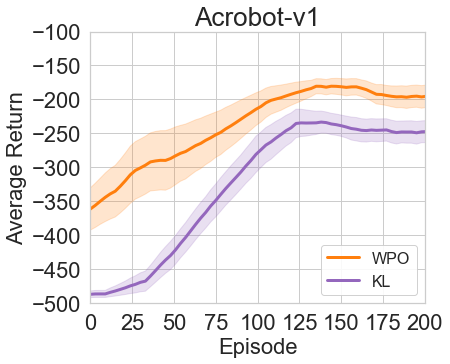

In [5]:
sns.set()
sns.set_style("whitegrid")
%matplotlib inline
plt.rcParams["figure.figsize"] = (6,5)


kl_file_list = ['./log_files/new/kl/Acrobot-v1-1606129918.103791.csv', './log_files/new/kl/Acrobot-v1-1606722078.1553438.csv', 
                './log_files/new/kl/Acrobot-v1-1606723595.9028962.csv', './log_files/new/kl/Acrobot-v1-1606724449.499972.csv']
wass_file_list = ['./log_files/new/wass/Acrobot-v1-1606129931.532935.csv', './log_files/new/wass/Acrobot-v1-1606722515.122457.csv',
                 './log_files/new/wass/Acrobot-v1-1606723241.432221.csv', './log_files/new/wass/Acrobot-v1-1606732735.969074.csv']
window_size = 30

ax = plt.subplot(111)
plt.ylabel('Average Return', fontsize=22)
plt.xlabel('Episode', fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlim(0,200)
plt.ylim(-500,-100)
plt.title('Acrobot-v1', fontsize = 26)

# DRPO Wass
eps_per_iter = 3
moving_average = find_drpo_moving_avg(wass_file_list, window_size,0.3)
ax.plot(np.arange(len(moving_average[0]))*eps_per_iter, moving_average[0], label='WPO', linewidth = 3,  color = "tab:orange")
ax.fill_between(np.arange(len(moving_average[0]))*eps_per_iter, moving_average[1], moving_average[2], alpha=0.2,  color = "tab:orange")

# DRPO KL
eps_per_iter = 3
moving_average = find_drpo_moving_avg(kl_file_list, window_size,0.3)
ax.plot(np.arange(len(moving_average[0]))*eps_per_iter, moving_average[0], label='KL', linewidth = 3, color = "tab:purple")
ax.fill_between(np.arange(len(moving_average[0]))*eps_per_iter, moving_average[1], moving_average[2], alpha=0.2,  color = "tab:purple")

plt.rcParams["legend.framealpha"] = 0.9
ax.legend(loc='lower right', fontsize = 16)